In [1]:
import os
import pandas as pd

In [2]:
def ratio_day(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(serie[i]/serie[i-1])
        
    return l

In [19]:
marker=["o", "*", "v", "s", "p"]

In [3]:
path_confirmed = os.path.join("csse_covid_19_data", "csse_covid_19_time_series")
file_confirmed = "time_series_19-covid-Confirmed.csv"

In [4]:
confirmed = pd.read_csv(
    os.path.join(path_confirmed, file_confirmed),
    index_col=["Country/Region", "Province/State", "Lat", "Long"],
).sort_index().T
confirmed.index = pd.to_datetime(confirmed.index)
confirmed.head()

Country/Region Afghanistan   Albania   Algeria   Andorra Antigua and Barbuda  \
Province/State         NaN       NaN       NaN       NaN                 NaN   
Lat                33.0000   41.1533   28.0339   42.5063             17.0608   
Long              65.0000   20.1683   1.6596    1.5218             -61.7964    
2020-01-22               0         0         0         0                   0   
2020-01-23               0         0         0         0                   0   
2020-01-24               0         0         0         0                   0   
2020-01-25               0         0         0         0                   0   
2020-01-26               0         0         0         0                   0   

Country/Region Argentina   Armenia                    Australia  \
Province/State       NaN       NaN Australian Capital Territory   
Lat             -38.4161   40.0691                     -35.4735   
Long           -63.6167   45.0382                      149.0124   
2020-01-22             0         0                            0   
2020-01-23             0         0                            0   
2020-01-24             0         0                            0   
2020-01-25             0         0                            0   
2020-01-26             0         0                            0   

Country/Region                                        ... United Kingdom  \
Province/State From Diamond Princess New South Wales  ... Cayman Islands   
Lat                          35.4437        -33.8688  ...        19.3133   
Long                        139.6380        151.2093  ...      -81.2546    
2020-01-22                         0               0  ...              0   
2020-01-23                         0               0  ...              0   
2020-01-24                         0               0  ...              0   
2020-01-25                         0               0  ...              0   
2020-01-26                         0               3  ...              0   

Country/Region                                                       Uruguay  \
Province/State Channel Islands Gibraltar Montserrat United Kingdom       NaN   
Lat                    49.3723   36.1408    16.7425        55.3781  -32.5228   
Long                 -2.3644   -5.3536    -62.1874       -3.4360   -55.7658    
2020-01-22                   0         0          0              0         0   
2020-01-23                   0         0          0              0         0   
2020-01-24                   0         0          0              0         0   
2020-01-25                   0         0          0              0         0   
2020-01-26                   0         0          0              0         0   

Country/Region Uzbekistan Venezuela   Vietnam    Zambia  
Province/State        NaN       NaN       NaN       NaN  
Lat               41.3775   6.4238    16.0000  -15.4167  
Long             64.5853  -66.5897   108.0000  28.2833   
2020-01-22              0         0         0         0  
2020-01-23              0         0         2         0  
2020-01-24              0         0         2         0  
2020-01-25              0         0         2         0  
2020-01-26              0         0         2         0  

[5 rows x 462 columns]

## Total

In [5]:
confirmed["Total"] = confirmed.sum(axis=1)

In [6]:
confirmed["ratio_tot"]=ratio_day(confirmed["Total"])

## W/o China

In [7]:
confirmed["Total_wo_China"] = confirmed["Total"] - confirmed.loc[:, "China"].sum(axis=1)

In [8]:
confirmed["ratio_wo_China"]=ratio_day(confirmed["Total_wo_China"])

## Canada

In [9]:
confirmed["Total_Can"] = confirmed.loc[:, "Canada"].sum(axis=1)

In [10]:
confirmed["ratio_Can"]=ratio_day(confirmed["Total_Can"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


## Quebec

In [11]:
confirmed["Total_Qc"] = confirmed.loc[:, ("Canada", "Quebec")].sum(axis=1)

In [12]:
confirmed["ratio_Qc"]=ratio_day(confirmed["Total_Qc"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


## France (métropole)

In [23]:
confirmed["Total_Fra"] = confirmed.loc[:, ("France", "France")].sum(axis=1)

In [25]:
confirmed["ratio_Fra"]=ratio_day(confirmed.loc[:, ("France", "France")].sum(axis=1))

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


## Plots

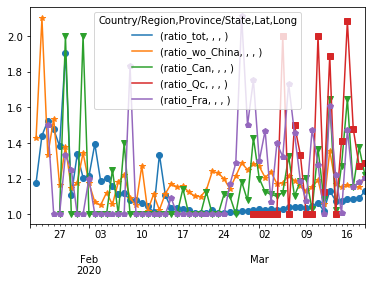

In [18]:
# Ratio
ax_ratio = confirmed[
    ["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra"]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])

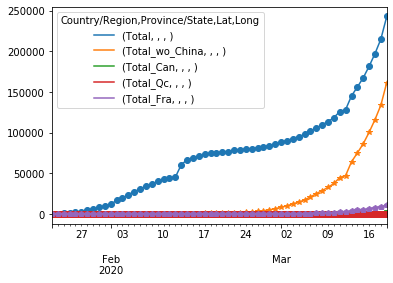

In [21]:
# Cases
ax_total = confirmed[
    ["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra"]
].plot()
for i, line in enumerate(ax_total.get_lines()):
    line.set_marker(markers[i])